In [1]:
%reload_ext autoreload
%autoreload 2

In [6]:
import os
import numpy as np


os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from Style.style_guide import animal_style
from Task_event.ms_task_performance import AlternationTaskPerformance

import matplotlib.pyplot as plt

def survival_curve(repeat_count):
    x = np.arange(1,10)
    y = np.array([np.sum(repeat_count>=xx)/len(repeat_count) for xx in x])
    return y

def abundance_hist(repeat_count):
    x = np.arange(1,20)
    y = np.array([np.sum(repeat_count==xx)/len(repeat_count) for xx in x]) #* x
    return y


def get_repeat_counts(nwb_file_name,epochs):
    repeat_count = []
    for epoch in epochs:
        key = {"nwb_file_name":nwb_file_name,"epoch":epoch}
        if not AlternationTaskPerformance() & key:
            continue
        visits = (AlternationTaskPerformance() & key).fetch1('current_wells')
        outbound_ind = np.where(visits[:-1] == 'center_well')[0]+1
        outbound_loc = visits[outbound_ind]
        switch_outbound_count = np.where(outbound_loc[:-1]!=outbound_loc[1:])[0]
        switch_outbound_count = np.append([-1],switch_outbound_count)
        repeat_count.extend(np.diff(switch_outbound_count))
    return repeat_count

# def get_repeat_counts(nwb_file_name,epochs):
#     repeat_count = []
#     for epoch in epochs:
#         key = {"nwb_file_name":nwb_file_name,"epoch":epoch}
#         if not AlternationTaskPerformance() & key:
#             continue
#         visits = (AlternationTaskPerformance() & key).fetch1('current_wells')
#         outbound_ind = np.where([not 'center_well' in visit for visit in visits])[0]
#         outbound_loc = visits[outbound_ind]
#         switch_outbound_count = np.where(outbound_loc[:-1]!=outbound_loc[1:])[0]
#         switch_outbound_count = np.append([-1],switch_outbound_count)
#         repeat_count.extend(np.diff(switch_outbound_count))
#     return repeat_count

# Survival Curves

In [3]:
nwb_file_name = 'Banner20220224_.nwb'
epochs = np.arange(10,20)



repeat_count = get_repeat_counts(nwb_file_name,epochs)
survival = survival_curve(repeat_count)
plt.plot(np.arange(1,1+survival.size),survival)



# Plot the null hypothesis
x_chance = np.arange(1,10)
survival_chance = .5**(x_chance-1)
plt.plot(x_chance,survival_chance,c='grey')

survival_learned = np.zeros_like(x_chance)
survival_learned[0] = 1
plt.plot(x_chance,survival_learned,c='limegreen')

NameError: name 'np' is not defined

# Frequency plots

Text(0, 0.5, 'Proportion of switches')

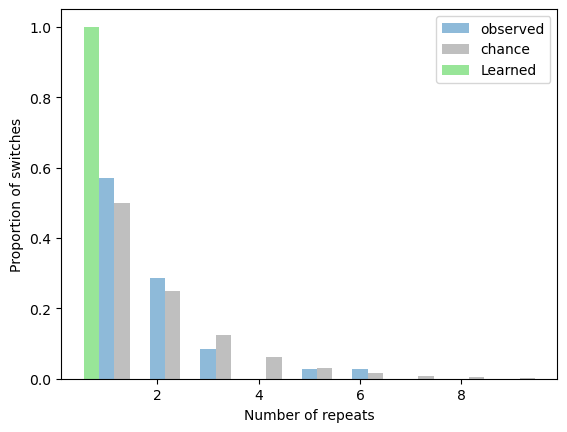

In [76]:
nwb_file_name = 'Banner20220224_.nwb'
epochs = np.arange(10)

width = .3
repeat_count = get_repeat_counts(nwb_file_name,epochs)
survival = abundance_hist(repeat_count)
# plt.plot(np.arange(1,1+survival.size),survival)
plt.bar(np.arange(1,1+survival.size),survival,alpha=.5,width=width,label = 'observed')


# Plot the null hypotheses
x_chance = np.arange(1,10)
survival_chance = .5**(x_chance)
plt.bar(x_chance+width,survival_chance,alpha=.5,facecolor='grey',width=width, label='chance')


plt.bar([1-width],[1],alpha=.5,facecolor='limegreen',width=width, label='Learned')

plt.legend()
plt.xlabel('Number of repeats')
plt.ylabel('Proportion of switches')

# All animals, first day

Text(0, 0.5, 'Proportion of switches')

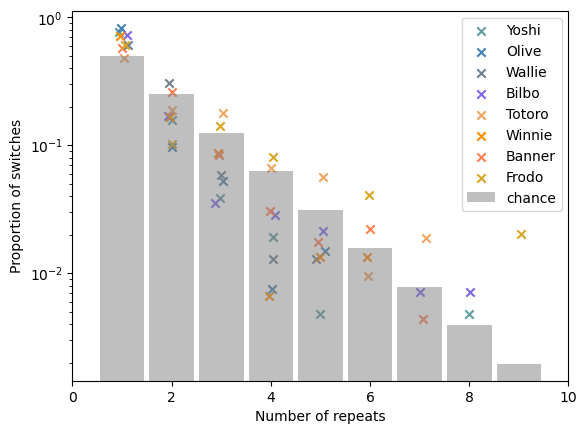

In [7]:
nwb_file_names_map = {
    "Yoshi": [
        "Yoshi20220517_.nwb",
        "Yoshi20220518_.nwb",
    ],
    "Olive": ["Olive20220711_.nwb"],
    "Wallie": ["Wallie20220922_.nwb"],
    "Bilbo": ["Bilbo20230802_.nwb", "Bilbo20230804_.nwb"],  # no entrainment
    "Totoro": ["Totoro20220613_.nwb", "Totoro20220614_.nwb"],
    "Winnie": ["Winnie20220719_.nwb", "Winnie20220720_.nwb"],
    "Banner": ["Banner20220224_.nwb", "Banner20220225_.nwb"],
    "Frodo": [
        "Frodo20230814_.nwb",
    ],  # "Frodo20230815_.nwb","Frodo20230816_.nwb",]
}


epochs = np.arange(0, 15)
for animal in nwb_file_names_map.keys():
    repeat_count = []
    total_epoch_count = 0
    for nwb_file_name in nwb_file_names_map[animal]:
        # for nwb_file_name in [nwb_file_names_map[animal][0]]:
        day_epochs = np.max(
            (AlternationTaskPerformance & {"nwb_file_name": nwb_file_name}).fetch(
                "epoch"
            )
        )
        sample_epochs = epochs - total_epoch_count
        sample_epochs = sample_epochs[sample_epochs >= 0]
        repeat_count.extend(get_repeat_counts(nwb_file_name, epochs))
        total_epoch_count += day_epochs

    survival = abundance_hist(repeat_count)
    plt.scatter(
        np.arange(1, 1 + survival.size) + np.random.normal(0, 0.05, survival.size),
        survival,
        label=animal,
        marker="x",
        color=animal_style.loc[animal]["color"],
    )

x_chance = np.arange(1, 10)
survival_chance = 0.5 ** (x_chance)
plt.bar(
    x_chance, survival_chance, alpha=0.5, facecolor="grey", width=0.9, label="chance"
)
plt.legend()
plt.xlim(0, 10)
plt.yscale("log")

plt.xlabel("Number of repeats")
plt.ylabel("Proportion of switches")

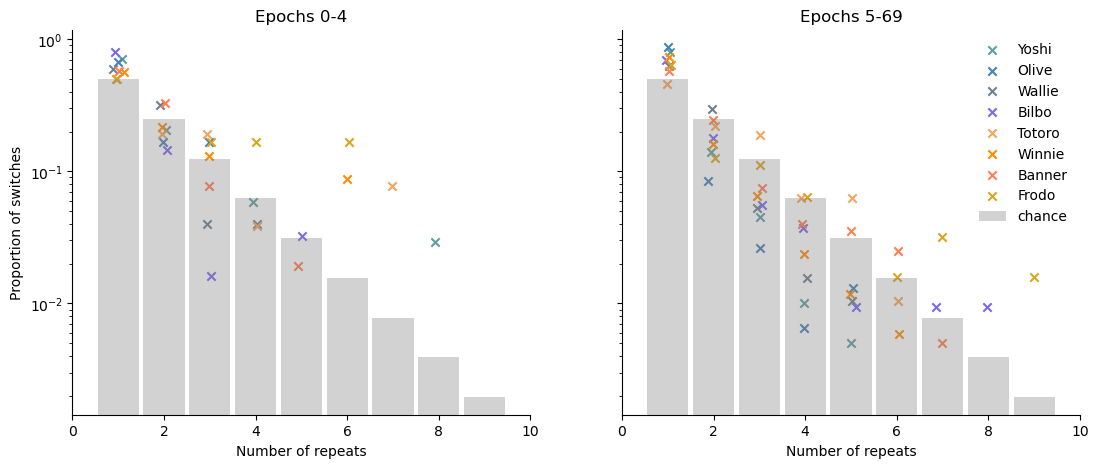

In [8]:
nwb_file_names_map = {
    "Yoshi": [
        "Yoshi20220517_.nwb",
        "Yoshi20220518_.nwb",
    ],
    "Olive": ["Olive20220711_.nwb"],
    "Wallie": ["Wallie20220922_.nwb"],
    "Bilbo": ["Bilbo20230802_.nwb", "Bilbo20230804_.nwb"],  # no entrainment
    "Totoro": ["Totoro20220613_.nwb", "Totoro20220614_.nwb"],
    "Winnie": ["Winnie20220719_.nwb", "Winnie20220720_.nwb"],
    "Banner": ["Banner20220224_.nwb", "Banner20220225_.nwb"],
    "Frodo": [
        "Frodo20230814_.nwb",
    ],  # "Frodo20230815_.nwb","Frodo20230816_.nwb",]
}


fig, ax_list = plt.subplots(ncols=2, figsize=(13, 5), sharey=True)
split = 5
for i, (epochs, ax) in enumerate(
    zip([np.arange(0, split), np.arange(split, 70)], ax_list)
):
    # for i,(epochs,ax) in enumerate(zip([np.arange(0,5),np.arange(15,50)],ax_list)):
    for j, animal in enumerate(nwb_file_names_map.keys()):
        color = animal_style.loc[animal]["color"]
        repeat_count = []
        total_epoch_count = 0
        for nwb_file_name in nwb_file_names_map[animal]:
            # for nwb_file_name in [nwb_file_names_map[animal][0]]:
            day_epochs = np.max(
                (AlternationTaskPerformance & {"nwb_file_name": nwb_file_name}).fetch(
                    "epoch"
                )
            )
            sample_epochs = epochs - total_epoch_count
            sample_epochs = sample_epochs[sample_epochs >= 0]
            repeat_count.extend(get_repeat_counts(nwb_file_name, epochs))
            total_epoch_count += day_epochs

        survival = abundance_hist(repeat_count)
        ax.scatter(
            np.arange(1, 1 + survival.size) + np.random.normal(0, 0.05, survival.size),
            survival,
            label=animal,
            marker="x",
            color=color,
        )

    x_chance = np.arange(1, 10)
    survival_chance = 0.5 ** (x_chance)  # * x_chance
    ax.bar(
        x_chance,
        survival_chance,
        alpha=0.35,
        facecolor="grey",
        width=0.9,
        label="chance",
    )
    ax.set_xlim(0, 10)
    ax.set_yscale("log")
    ax.set_xlabel("Number of repeats")
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_title(f"Epochs {epochs[0]}-{epochs[-1]}")
ax_list[0].set_ylabel("Proportion of switches")
ax_list[1].legend(frameon=False)